# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Importing The Dataset

In [2]:
df = pd.read_csv('data_1.csv')

# Splitting the dataset

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y = label_binarize(y,classes=[1,2,3])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Varying Hyperparameters

In [4]:
def compute_metrics(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy ",accuracy_score(y_test,y_pred))
  print("Precision ", precision_score(y_test,y_pred,average='micro'))
  print("Recall ",recall_score(y_test,y_pred,average='micro'))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  for i in range(3):
      plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('AUC-ROC Curve')
  plt.legend()
  plt.show()

### 1. Criterion

In [5]:
params = {'criterion':["gini","entropy"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'criterion': 'entropy'}


Accuracy  0.9655172413793104
Precision  0.9655172413793104
Recall  0.9655172413793104


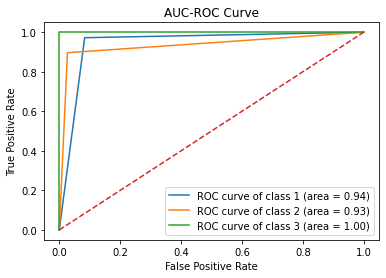

In [6]:
decision_tree = DecisionTreeClassifier(random_state=0,criterion='entropy')
compute_metrics(decision_tree)

### 2. Splitter

Accuracy  0.9448275862068966
Precision  0.9448275862068966
Recall  0.9448275862068966


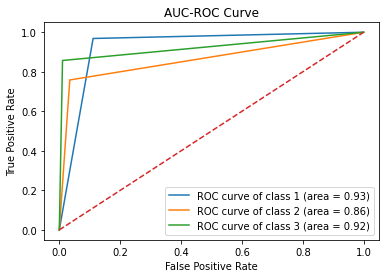

In [7]:
decision_tree = DecisionTreeClassifier(random_state=0,splitter="random")
compute_metrics(decision_tree)

### 3. Min Samples Split

In [8]:
params = {'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'min_samples_split': 3}


Accuracy  0.9413793103448276
Precision  0.9446366782006921
Recall  0.9413793103448276


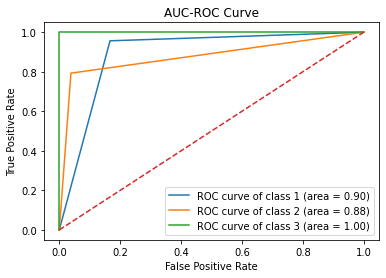

In [9]:
decision_tree = DecisionTreeClassifier(random_state=0,min_samples_split=3)
compute_metrics(decision_tree)

## 4. Max Depth

In [10]:
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'max_depth': 6}


Accuracy  0.9586206896551724
Precision  0.9586206896551724
Recall  0.9586206896551724


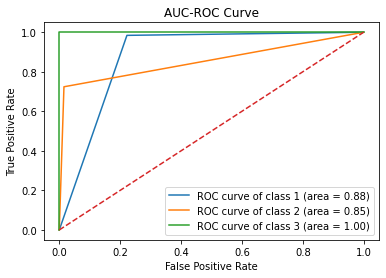

In [11]:
decision_tree = DecisionTreeClassifier(random_state=0,max_depth=6)
compute_metrics(decision_tree)

## 5. Min Samples Leaf

In [12]:
params = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'min_samples_leaf': 3}


Accuracy  0.9620689655172414
Precision  0.9653979238754326
Recall  0.9620689655172414


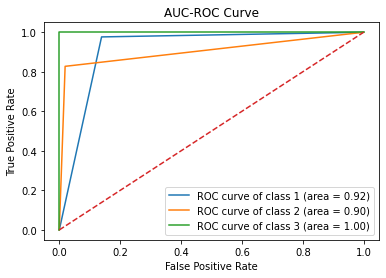

In [13]:
decision_tree = DecisionTreeClassifier(random_state=0,min_samples_leaf=3)
compute_metrics(decision_tree)

## 6. Max Features

In [14]:
params = {'max_features':["sqrt","log2"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'max_features': 'sqrt'}


Accuracy  0.9344827586206896
Precision  0.9344827586206896
Recall  0.9344827586206896


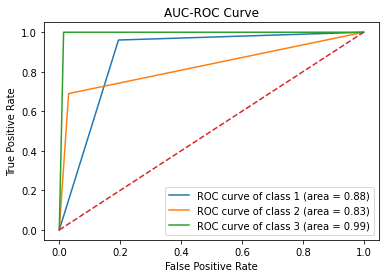

In [15]:
decision_tree = DecisionTreeClassifier(random_state=0,max_features="sqrt")
compute_metrics(decision_tree)

## 7. Class Weight

Accuracy  0.9448275862068966
Precision  0.9448275862068966
Recall  0.9448275862068966


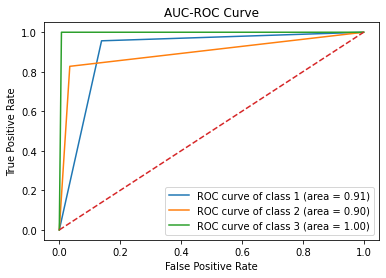

In [16]:
decision_tree = DecisionTreeClassifier(random_state=0,class_weight="balanced")
compute_metrics(decision_tree)

## 8. Max Leaf Nodes

In [17]:
params = {'max_leaf_nodes':[5,12,19,26,33,40,47,54]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=params)
grid_search.fit(X_train,y_train)
print("Best Params: ",grid_search.best_params_)

Best Params:  {'max_leaf_nodes': 5}


Accuracy  0.9655172413793104
Precision  0.9655172413793104
Recall  0.9655172413793104


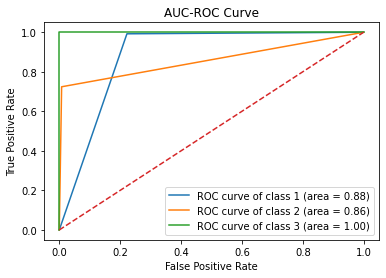

In [18]:
decision_tree = DecisionTreeClassifier(random_state=0,max_leaf_nodes=5)
compute_metrics(decision_tree)